## Author: Makayla McKibben
### Course: DSC 530 Data Exploration and Analysis
### Exercise 4.2 Probability Mass Functions and Cumulative Distribution Functions
### Date: 09.20.2024

## Exercises

**Exercise 3-1:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [4]:
# Download relevant data
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [5]:
# Import relevant datasets and libraries
import nsfg
import first
import thinkstats2
import thinkplot
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
# Select all live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [7]:
# Create df for different classes of births
live, firsts, others = first.MakeFrames()

In [8]:
# Function from Think Stats
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1 / x

    new_pmf.Normalize()
    return new_pmf

In [9]:
# Download relevant data
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [10]:
# Read relevant data
resp = nsfg.ReadFemResp()

In [11]:
# Create PMF of children in household
children_pmf = thinkstats2.Pmf(resp.numkdhh, label = "Children in Household")

In [12]:
# Create biased PMF
children_bias_pmf = BiasPmf(children_pmf, "Biased Children in Household")

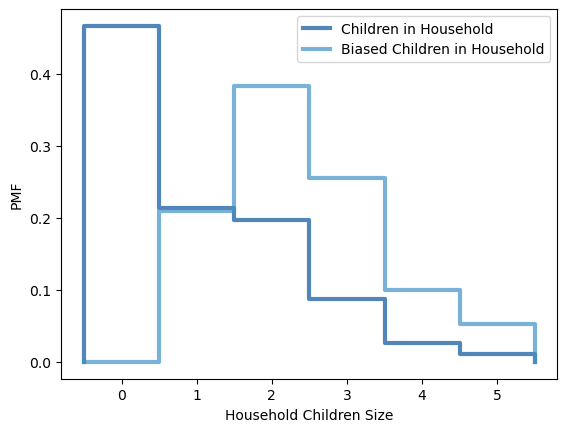

In [13]:
# Plot PMF and biased PMF
thinkplot.PrePlot(2)
thinkplot.Pmfs([children_pmf, children_bias_pmf])
thinkplot.Config(xlabel="Household Children Size", ylabel="PMF")

In [14]:
# Calculate PMF mean of children in household
children_pmf_mean = children_pmf.Mean()

In [15]:
# Calculate biased PMF mean
children_bias_pmf_mean = children_bias_pmf.Mean()

In [16]:
# Print the means
print("The actual mean of children in a household from this dataset is: ", children_pmf_mean)
print("The biased mean of children in a household from this dataset is: ", children_bias_pmf_mean)

The actual mean of children in a household from this dataset is:  1.024205155043831
The biased mean of children in a household from this dataset is:  2.403679100664282


**Exercise 3-2:** In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \bar x = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \bar x)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [18]:
# Sets up the function PmfMean which takes a pmf as its input
def PmfMean(pmf):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    # Multiply the probability times the value of the pmf for each point in the pmf
    # Then sum the multiplied values to calculate the mean of the pmf
    return sum(p * x for x, p in pmf.Items())

In [19]:
# Sets up the function PmfVar which takes a pmf and mu as its input. 
# mu is the mean of the pmf, it is set to none here and in the next line
# of the function calls the mean of the pmf for its value
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.
    mu: the point around which the variance is computed;
            if omitted, computes the mean
    returns: float variance
    """
    # Because mu is set to none in the function mu is simply equal to the mean of the pmf
    if mu is None:
        mu = PmfMean(pmf)
    # First we take the value of the point of the pmf then subtract mu which is the 
    # mean in this case, then we square that value. We take our squared value and 
    # multiply it by the probability then sum all of the values we obtain that way
    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [20]:
# Calculate mean of PMF
PmfMean(children_pmf)

1.024205155043831

In [21]:
# Calculate variance of PMF
PmfVar(children_pmf)

1.4128643263531195

In [22]:
# Print the variance calculated each way
print("The variance of the pmf for the children in a household using pmf.Var is: ", children_pmf.Var())
print("The variance of the pmf for the children in a household using PmfVar is: ", PmfVar(children_pmf))

The variance of the pmf for the children in a household using pmf.Var is:  1.4128643263531195
The variance of the pmf for the children in a household using PmfVar is:  1.4128643263531195


**Exercise 4-1:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [24]:
# Functions from Thinkstats
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [25]:
# Create distribution of first children birth weights
firsts_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label = 'Firsts')

In [26]:
# Get percentile rank of my birth weight
my_percentile_rank = firsts_cdf.PercentileRank(7.375)

In [27]:
# Print my percentile rank
print("My percentile rank for first child birth weight is: ", my_percentile_rank)

My percentile rank for first child birth weight is:  54.870501948200776


**Exercise 4-2:** The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [29]:
# Import relevant libraries
import random

In [30]:
# Create empty list
rand_lst = []
# Use for loop to append 1000 random numbers to the list
for i in range(0, 1000):
    rand = random.random()
    rand_lst.append(rand)
    i += 1

In [31]:
# Create PMF from random list
rand_pmf = thinkstats2.Pmf(rand_lst)

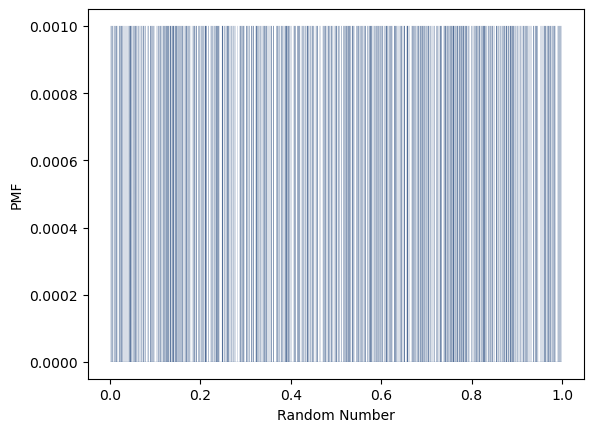

In [32]:
# Plot PMF with line width thin enough to see the distribution more clearly
thinkplot.Pmf(rand_pmf, linewidth = 0.08)
thinkplot.Config(xlabel="Random Number", ylabel="PMF")

In [33]:
# Create cumulative distribution funtion from random list
rand_cdf = thinkstats2.Cdf(rand_lst)

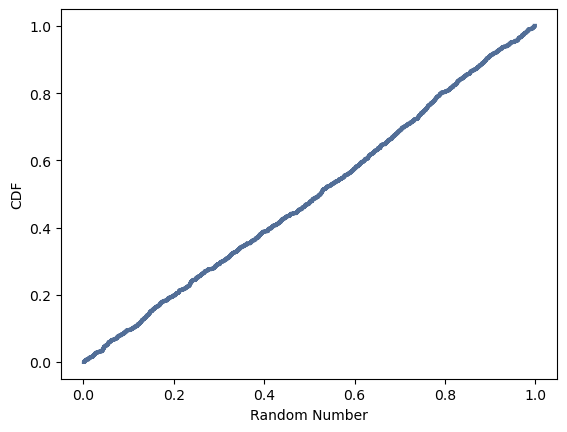

In [34]:
# Plot CDF
thinkplot.Cdf(rand_cdf)
thinkplot.Config(xlabel = 'Random Number', ylabel = 'CDF')

Based on the pmf and cdf graphs the distribution is not perfectly uniform. For my particular numbers there is a dip (CDF) or gap (PMF) visible around 0.7. There are other dips and gaps that are less pronounced.